In [71]:

from DNA import DNA
from Graficador import *
from Seleccion import Seleccion
import pandas as pd
from Cromosoma import Cromosoma

In [72]:
DATOS_EN_TABLA = '../TablaCapitales.xlsx' 
RUTA =  DATOS_EN_TABLA
FILAS_TABLA = 24 
lista_provincias_visitadas = []
cantidad_km = 0 

df = pd.read_excel(DATOS_EN_TABLA)

def devolver_informacion_tabla_crudo():
    df = pd.read_excel(RUTA)
    tabla = df.values 
 
    return tabla

In [73]:
def procesar_informacion_tabla(tabla: pd.DataFrame):
    lista_provincias = list(tabla[:,0])
    
    return [lista_provincias, tabla]

lista_provincias,tabla = procesar_informacion_tabla(devolver_informacion_tabla_crudo())

In [74]:
 

def get_distance(city1: str, city2: str) -> float:
    distancia = tabla[city1][city2+1]
    if type(distancia) == float:
        return distancia 


Generando un marco de datos

In [75]:
datos = []


In [76]:
obtener_mejor_cromosoma = lambda poblacion: sorted(poblacion, key=lambda cromosoma: cromosoma.fitness, reverse=True)[0]

In [77]:
def ciclo(poblacion,fObjetivo,fFitness,numero_ciclo):
    DNA1 =  DNA(poblacion)
    elites = []
    res_objetivo = DNA1.calcular_objetivo(fObjetivo)
    res_fitness = DNA1.calcular_fitness(fFitness)
 
 
    elites = Seleccion.elitismo(DNA1.poblacion,2)  
    cantidad = 50-len(elites)
    
    cromosomas_padres = Seleccion.torneo(DNA1.poblacion,cantidad) 
    cromosomas_hijos = DNA.cruzar_poblacion_numeros(cromosomas_padres)    

    mejor_cromosoma = obtener_mejor_cromosoma(poblacion)
    datos.append([numero_ciclo,mejor_cromosoma.genes,mejor_cromosoma.fitness,mejor_cromosoma.objetivo])

    if len(cromosomas_hijos)>0:
        nueva_poblacion = cromosomas_hijos + elites

    return nueva_poblacion


In [78]:
import pandas as pd
ciclos = 200
cantidad_cromosomas = 50
funcion_objetivo = lambda x,y: get_distance(x,y)       
fitness = lambda x: 1/x  
Cromosoma.setProbMutacion(0.4)
Cromosoma.setProbCrossover(0.75)
poblacion = DNA.generar_poblacion_numeros(cantidad_cromosomas) 
mejor_cromosoma = [0,None] 

for i in range(ciclos):
    nueva_poblacion = ciclo(poblacion,funcion_objetivo,fitness,i)

    if i == ciclos-1:
        res = obtener_mejor_cromosoma(poblacion)
        mejor_cromosoma[0] = res.objetivo
        mejor_cromosoma[1] = res 
            
    
    poblacion = nueva_poblacion 

    
ultimo_cromosoma = mejor_cromosoma[1]
dist_total = 0
datos_mejor_cromosoma = []
print(f'Ultimo cromosoma: {ultimo_cromosoma}')
for ciudad in range(0,len(ultimo_cromosoma.genes)-1):
    ciudad1 = ultimo_cromosoma.genes[ciudad]
    ciudad2 = ultimo_cromosoma.genes[ciudad+1]
    distancia = get_distance(ciudad1,ciudad2)
    dist_total += distancia
    
    datos_mejor_cromosoma.append([lista_provincias[ciudad1],lista_provincias[ciudad2],int(distancia)])


ciudad_inicio = ultimo_cromosoma.genes[0]
ciudad_fin = ultimo_cromosoma.genes[-1]
distancia_inicio_fin = get_distance(ciudad_inicio,ciudad_fin)


datos_mejor_cromosoma.append([lista_provincias[ciudad_fin],lista_provincias[ciudad_inicio],int(distancia_inicio_fin)])

df = pd.DataFrame(datos_mejor_cromosoma, columns=['Ciudad 1','Ciudad 2','Distancia'])
df['Distancia Acumulada'] = df['Distancia'].cumsum()
print(f'KM(Totales):  {ultimo_cromosoma.objetivo} km | fitness = {ultimo_cromosoma.fitness}') 
df







Ultimo cromosoma: [6, 17, 5, 13, 18, 7, 12, 22, 4, 0, 9, 3, 2, 11, 15, 16, 14, 21, 8, 19, 1, 20, 10] 11809.0
KM(Totales):  11809.0 km | fitness = 8.46811753747142e-05


,Ciudad 1,Ciudad 2,Distancia,Distancia Acumulada
0,Mendoza,San Juan,152,152
1,San Juan,La Rioja,283,435
2,La Rioja,S.F.d.V.d. Catamarca,149,584
3,S.F.d.V.d. Catamarca,San Luis,540,1124
4,San Luis,Neuquén,643,1767
5,Neuquén,Río Gallegos,1410,3177
6,Río Gallegos,Ushuaia,359,3536
7,Ushuaia,La Plata,2350,5886
8,La Plata,Cdad. de Bs. As.,53,5939
9,Cdad. de Bs. As.,Posadas,834,6773


In [79]:
df = pd.DataFrame(datos, columns=['i', 'ruta', 'fitness', 'objetivo'])
df


,i,ruta,fitness,objetivo
0,0,"[12, 4, 6, 20, 18, 22, 21, 2, 9, 7, 5, 14, 8, ...",0.000046,21795.0
1,1,"[12, 4, 6, 20, 18, 22, 0, 2, 9, 7, 5, 14, 8, 1...",0.000047,21074.0
2,2,"[12, 4, 6, 20, 18, 22, 21, 2, 9, 7, 5, 17, 13,...",0.000048,20804.0
3,3,"[21, 9, 6, 20, 18, 22, 12, 2, 4, 7, 5, 17, 8, ...",0.000049,20493.0
4,4,"[21, 17, 6, 20, 18, 22, 12, 2, 4, 7, 5, 9, 8, ...",0.000051,19733.0
...,...,...,...,...
195,195,"[6, 1, 8, 0, 4, 22, 12, 7, 20, 19, 11, 2, 9, 3...",0.000084,11868.0
196,196,"[6, 1, 8, 0, 4, 22, 12, 7, 20, 19, 11, 2, 9, 3...",0.000084,11868.0
197,197,"[6, 1, 8, 0, 4, 22, 12, 7, 20, 19, 11, 2, 9, 3...",0.000084,11868.0
198,198,"[6, 17, 5, 13, 18, 7, 12, 22, 4, 0, 9, 3, 2, 1...",0.000085,11809.0


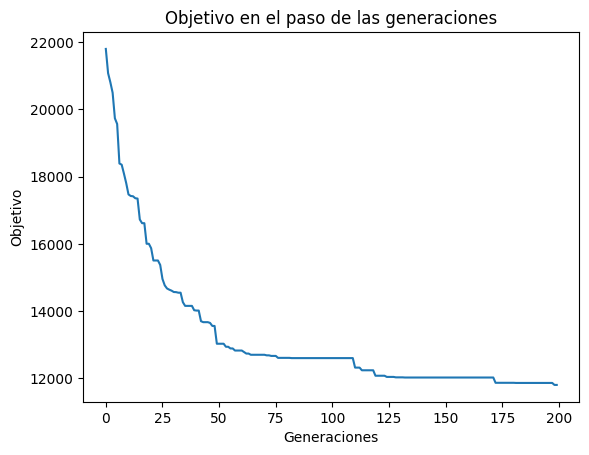

In [80]:
import matplotlib.pyplot as plt

# extraer los datos de la columna 'objetivo' y 'i'
objetivos = df['objetivo']
pasos = df['i']

# graficar los datos
plt.plot(pasos, objetivos)
plt.xlabel('Generaciones')
plt.ylabel('Objetivo')
plt.title('Objetivo en el paso de las generaciones')
plt.show()
